In [1]:
# El criterio de convergencia usado está en:
# 'Introduction to Numerical Relativity' de Degollado, y
# 'Numerical Methods for initial value problems in physics' de Siddhartha.

# Importamos bibliotecas.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definimos una función que lea los archivos de datos y regrese la información formateada en arreglos.
def lector():
    # Definimos la ruta de los archivos.
    # Desde Fortran ya guardamos el máximo de los valores absolutos
    # en cada línea temporal.
    ruta_h = '0.01/error.t'
    ruta_hmid = '0.005/error.t'
    ruta_hqua = '0.0025/error.t'

    # Ahora abrimos los archivos de error.
    with open(ruta_h, 'r') as f:
        archivo_h = f.readlines()

    with open(ruta_hmid, 'r') as f:
        archivo_hmid = f.readlines()

    with open(ruta_hqua, 'r') as f:
        archivo_hqua = f.readlines()

    # Definimos los arreglos que usaremos.
    tiempo = []
    error_h = []
    error_hmid = []
    error_hqua = []

    # Leemos cada línea del archivo, la partimos en dos (una por cada columna),
    # llenamos los archivos con la segunda columna convertida a flotante,
    # así mismo llenamos el parámetro temporal.
    for linea in archivo_h:
        renglon = linea.split()
        tiempo.append( float(renglon[0]) )

    for linea in archivo_h:
        renglon = linea.split()
        error_h.append( float(renglon[1]) )

    for linea in archivo_hmid:
        renglon = linea.split()
        error_hmid.append( float(renglon[1]) )

    for linea in archivo_hqua:
        renglon = linea.split()
        error_hqua.append( float(renglon[1]) )

    # Regresamos los 3 arreglos, uno para cada presición, en forma de 'np.array' para trabajar con ellos.
    return [np.array(tiempo[1:]), np.array(error_h), np.array(error_hmid), np.array(error_hqua)]

In [7]:
# Definimos la fución principal, el argumento 'l' será el orden de la norma para el cociente de Lax.
def main():

    # En 'lax' guardaremos el cociente de los errores en cada línea temporal.
    lax = []

    # Llamamos al lector para tener la información deseada.
    solucion = lector()
    parametro = solucion[0]
    error_h = solucion[1]
    error_hmid = solucion[2]
    error_hqua = solucion[3]

    # Iteramos sobre cada línea temporal para calcular el cociente.
    # La primer línea (i=0) hace que el denominador se anule, con lo que el
    # cociente es un nan, así que el ciclo temporal comienza en 1.
    for i in range( 1, len(parametro)+1 ):
        delta1 = error_h[i]
        delta2 = error_hmid[i]
        delta3 = error_hqua[i]

        #cociente = (delta1 - delta2)/(delta2 - delta3)
        cociente = delta1/delta2
        lax.append(cociente)

    # Imprimimos el promedio en todas las líneas temporales.
    # Y calculamos el orden de convergencia.
    print(f'El promedio de los cocientes en el tiempo es: {np.mean(lax)}')
    print(f'Entonces el método converge a orden: {np.log2(np.mean(lax))}')

    # Graficamos.
    plt.plot(parametro, lax)
    plt.axhline(y=4, linestyle='-', color='r')
    plt.title('Factor de convergencia en función del tiempo')
    plt.xlabel('tiempo físico')
    plt.ylabel('valor del cociente')
    plt.grid()
    plt.show()
    
    return


El promedio de los cocientes en el tiempo es: 5.288740787107886
Entonces el método converge a orden: 2.4029242674347873


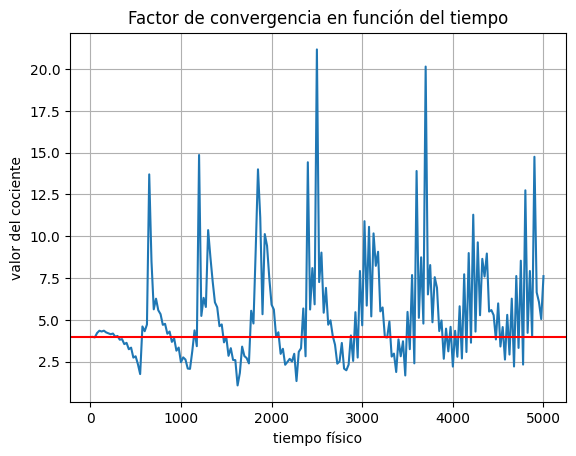

In [8]:
# Ejecutamos la función principal.
if __name__ == '__main__':
    main()